In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
pd.set_option('display.max_columns', None)
states = ["AL", "AR", "AZ","CA", "CO", "CT", "DC", "DE", "FL", "GA", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]
us_state_abbrev = {'the United States':'US','Alabama': 'AL','Alaska': 'AK','American Samoa': 'AS','Arizona': 'AZ','Arkansas': 'AR','California': 'CA','Colorado': 'CO', 'Connecticut': 'CT','Delaware': 'DE','District of Columbia': 'DC', 'Florida': 'FL','Georgia': 'GA','Guam': 'GU','Hawaii': 'HI', 'Idaho': 'ID','Illinois': 'IL','Indiana': 'IN','Iowa': 'IA','Kansas': 'KS','Kentucky': 'KY','Louisiana': 'LA', 'Maine': 'ME','Maryland': 'MD','Massachusetts': 'MA','Michigan': 'MI','Minnesota': 'MN','Mississippi': 'MS','Missouri': 'MO', 'Montana': 'MT','Nebraska': 'NE','Nevada': 'NV','New Hampshire': 'NH','New Jersey': 'NJ','New Mexico': 'NM','New York': 'NY','North Carolina': 'NC', 'North Dakota': 'ND','Northern Mariana Islands':'MP','Ohio': 'OH','Oklahoma': 'OK','Oregon': 'OR','Pennsylvania': 'PA','Puerto Rico': 'PR', 'Rhode Island': 'RI','South Carolina': 'SC','South Dakota': 'SD','Tennessee': 'TN','Texas': 'TX','Utah': 'UT', 'Vermont': 'VT','Virgin Islands': 'VI','Virginia': 'VA','Washington': 'WA','West Virginia': 'WV','Wisconsin': 'WI','Wyoming': 'WY'}
abbrev_us_state = dict(map(reversed, us_state_abbrev.items()))
plt.style.use('ggplot')

api_key = 'c539dd02b98ef2d57482dfe39f7d6980'
my_url = 'http://api.eia.gov/series/?api_key=' + api_key + '&series_id='

In [2]:
start_year = 2000
end_year = 2019
inflation_adjustment_year = 2019
year_range = range(start_year,end_year+1)

In [3]:
fred_prefix = 'https://api.stlouisfed.org/fred/series/observations?series_id='
fred_api = 'd00618cf19b6ee0f138dbd06ad3b89da'
fred_series = 'CPIAUCSL'
fred_url = fred_prefix + fred_series + '&api_key='+ fred_api + '&file_type=json&frequency=a'
r = requests.get(fred_url)
json_data = r.json()

In [4]:
year_to_cpi = dict()
for o in list(json_data['observations']):
    year = str(o['date'][0:4])
    cpi = o['value']
    year_to_cpi[year] = cpi

In [5]:
inf = pd.DataFrame(columns=[str(i) for i in year_range])
cpis = [year_to_cpi[str(i)] for i in year_range]
inf.loc[0] = cpis
adjustment_denom = float(inf.loc[0,str(inflation_adjustment_year)])
iafs = [float(cpis[i])/adjustment_denom for i in range(len(year_range))]
inf.loc[1] = iafs

In [6]:
cpi = [0.673538,0.692509,0.703559,0.719726,0.738923,0.763797,0.788405,0.811037,0.841977,0.839282,0.853016,0.879798,0.898038,0.911204,0.925923,0.927046,0.938792,0.958862,0.982199,1]

In [7]:
inf.head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,172.192,177.042,179.867,184.000,188.908,195.267,201.558,207.344,215.254,214.565,218.076,224.923,229.586,232.952,236.715,237.002,240.005,245.136,251.102,255.653
1,0.673538,0.692509,0.703559,0.719726,0.738923,0.763797,0.788405,0.811037,0.841977,0.839282,0.853016,0.879798,0.898038,0.911204,0.925923,0.927046,0.938792,0.958862,0.982199,1


In [8]:
def get_tags(sa):
    return ['NG.N3050'+sa+'3.A','NG.N3010'+sa+'3.A','NG.N3020'+sa+'3.A']

def get_elec_tags(sa):
    return ['SEDS.ESRCD.'+sa+'.A','SEDS.ESCCD.'+sa+'.A']

def get_gas_revenue_tags(sa):
    #Res Consumption (Mcf), Com Consumption (Mcf), Res Price ($/Tcf), Com Price ($/Tcf)
    return ['SEDS.NGRCP.'+sa+'.A', 'NG.N3010'+sa+'3.A',
            'SEDS.NGCCP.'+sa+'.A', 'NG.N3020'+sa+'3.A', 
            'SEDS.NGICP.'+sa+'.A','SEDS.NGICD.'+sa+'.A']

def return_state_EIA_data(start_year, end_year, sa, tags):
    years = range(start_year, end_year+1)
    final_output = pd.DataFrame(index=years)
    final_output.index.name = 'Year'
    for d in tags:
        try:
            r = requests.get(my_url + d)
        except:
            print('Error requesting the following API Key: ', d)
        json_data = r.json()
        json_data = json_data['series'][0]
        value_name = json_data['name'] + ' (' + json_data['units'] +')'
        json_data['data']
        temp_dict = dict()
        for pair in json_data['data']:
            temp_dict[str(pair[0])] = pair[1]
        temp_col = []
        for year in years:
            temp_val = ''
            if(str(year) in temp_dict.keys()):
                temp_val = temp_dict[str(year)]  
            temp_col.append(temp_val)
        final_output[value_name] = temp_col

    return final_output.T

In [9]:
dfr = return_state_EIA_data(2000,2019,'CA',get_gas_revenue_tags('CA'))
dfr.head(6)

Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
"Natural gas consumed by (delivered to) the residential sector, California (Million cubic feet)",516730.00,512695.00,510995.00,497955.00,512046.00,483699.00,491777.00,492378.00,489304.00,480721.00,494890.00,512565.00,477931.00,481773.00,397489.00,401172.00,411828.00,431005.00,423915.00,464672.00
"California Price of Natural Gas Delivered to Residential Consumers, Annual (Dollars per Thousand Cubic Feet)",8.21,10.43,7.11,9.13,9.86,11.85,11.79,11.57,12.75,9.43,9.92,9.93,9.14,9.92,11.51,11.39,11.84,12.49,12.30,12.95
"Natural gas consumed by (delivered to) the commercial sector, California (Million cubic feet)",246439.00,245795.00,238308.00,232912.00,231597.00,233082.00,244432.00,251024.00,251045.00,247775.00,247997.00,246141.00,253148.00,254845.00,237675.00,235791.00,236967.00,237352.00,248012.00,255981.00
"California Price of Natural Gas Sold to Commercial Consumers, Annual (Dollars per Thousand Cubic Feet)",7.54,9.33,6.07,8.15,8.63,10.69,10.43,10.20,11.75,7.75,8.30,8.29,7.05,7.81,9.05,8.04,8.42,8.76,8.57,9.41
"Natural gas consumed by the industrial sector, California (Million cubic feet)",840531.00,719121.00,784853.00,821105.00,875921.00,822121.00,791763.00,797977.00,787599.00,771892.00,770837.00,752982.00,789496.00,828649.00,834167.00,822801.00,816878.00,803207.00,807353.00,808070.00
"Natural gas price in the industrial sector, California (Dollars per million Btu)",5.53,6.50,4.84,7.05,7.74,9.62,9.09,8.81,10.51,6.39,6.87,6.91,5.66,6.40,7.44,6.18,6.56,6.81,6.89,7.44


In [9]:
dfr_states = pd.DataFrame(columns=['Metric','State'] + list(dfr.columns))
for sa in states:
    try:
        dfr = return_state_EIA_data(2000,2019,sa,get_gas_revenue_tags(sa))
        res_rev = [dfr.iloc[0,i]*1000*dfr.iloc[1,i] for i in range(len(dfr.columns))]
        com_rev = [dfr.iloc[2,i]*1000*dfr.iloc[3,i] for i in range(len(dfr.columns))]
        #ind_rev = [dfr.iloc[4,i]*1030*dfr.iloc[5,i] for i in range(len(dfr.columns))]
        dfr_states.loc[len(dfr_states.index)] = ['Natural Gas Revenue ($)', sa] + [res_rev[i] + com_rev[i] for i in range(len(res_rev))]
    except:
        print(sa)

In [68]:
dfr_states.tail()

,Metric,State,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
44,Natural Gas Revenue ($),VA,1.295778e+09,1.399990e+09,1.189588e+09,1.616425e+09,1.732693e+09,2.073309e+09,1.938333e+09,2.045020e+09,2.149095e+09,1.865954e+09,1.780339e+09,1.631601e+09,1.402943e+09,1.602552e+09,1.782054e+09,1.556641e+09,1.328018e+09,1.493610e+09,1.642810e+09,1.640427e+09
45,Natural Gas Revenue ($),WA,8.177189e+08,1.319152e+09,1.067117e+09,9.525534e+08,1.158413e+09,1.387627e+09,1.622525e+09,1.775577e+09,1.749483e+09,1.856640e+09,1.463285e+09,1.637799e+09,1.472902e+09,1.461824e+09,1.325709e+09,1.337625e+09,1.261113e+09,1.465514e+09,1.309479e+09,1.340441e+09
46,Natural Gas Revenue ($),WV,4.079298e+08,4.510999e+08,4.423929e+08,5.322404e+08,5.859542e+08,6.938615e+08,7.481772e+08,6.896467e+08,7.418201e+08,7.243936e+08,5.635641e+08,5.060535e+08,4.543622e+08,4.734194e+08,5.034849e+08,4.660601e+08,3.908341e+08,3.826112e+08,4.615875e+08,4.253790e+08
47,Natural Gas Revenue ($),WI,1.532766e+09,1.671944e+09,1.532975e+09,2.011395e+09,2.089166e+09,2.458968e+09,2.354033e+09,2.498749e+09,2.886770e+09,2.251532e+09,1.979410e+09,1.963609e+09,1.608181e+09,1.926892e+09,2.517509e+09,1.694720e+09,1.570164e+09,1.697653e+09,1.806116e+09,1.787896e+09
48,Natural Gas Revenue ($),WY,1.257945e+08,1.716101e+08,1.303046e+08,1.450264e+08,1.763790e+08,2.071808e+08,2.332568e+08,1.838924e+08,2.253535e+08,2.019196e+08,1.903316e+08,2.009750e+08,1.672859e+08,1.946113e+08,2.176582e+08,2.041260e+08,1.899110e+08,2.097888e+08,2.041533e+08,1.951742e+08


In [69]:
tot = ['Natural Gas Revenue (Billion $)','US Total']
add = [int(sum(dfr_states.loc[:,(i)]))/1000000000 for i in range(2000,2020)]
dfr_states.loc[49] = tot+add

In [70]:
dfr_states.tail()

,Metric,State,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
45,Natural Gas Revenue ($),WA,8.177189e+08,1.319152e+09,1.067117e+09,9.525534e+08,1.158413e+09,1.387627e+09,1.622525e+09,1.775577e+09,1.749483e+09,1.856640e+09,1.463285e+09,1.637799e+09,1.472902e+09,1.461824e+09,1.325709e+09,1.337625e+09,1.261113e+09,1.465514e+09,1.309479e+09,1.340441e+09
46,Natural Gas Revenue ($),WV,4.079298e+08,4.510999e+08,4.423929e+08,5.322404e+08,5.859542e+08,6.938615e+08,7.481772e+08,6.896467e+08,7.418201e+08,7.243936e+08,5.635641e+08,5.060535e+08,4.543622e+08,4.734194e+08,5.034849e+08,4.660601e+08,3.908341e+08,3.826112e+08,4.615875e+08,4.253790e+08
47,Natural Gas Revenue ($),WI,1.532766e+09,1.671944e+09,1.532975e+09,2.011395e+09,2.089166e+09,2.458968e+09,2.354033e+09,2.498749e+09,2.886770e+09,2.251532e+09,1.979410e+09,1.963609e+09,1.608181e+09,1.926892e+09,2.517509e+09,1.694720e+09,1.570164e+09,1.697653e+09,1.806116e+09,1.787896e+09
48,Natural Gas Revenue ($),WY,1.257945e+08,1.716101e+08,1.303046e+08,1.450264e+08,1.763790e+08,2.071808e+08,2.332568e+08,1.838924e+08,2.253535e+08,2.019196e+08,1.903316e+08,2.009750e+08,1.672859e+08,1.946113e+08,2.176582e+08,2.041260e+08,1.899110e+08,2.097888e+08,2.041533e+08,1.951742e+08
49,Natural Gas Revenue (Billion $),US Total,6.014429e+01,7.190323e+01,5.924858e+01,7.450400e+01,8.156483e+01,9.478449e+01,9.326929e+01,9.521919e+01,1.059009e+02,8.841919e+01,8.318626e+01,7.986827e+01,6.752005e+01,7.733035e+01,8.685709e+01,7.328571e+01,6.646193e+01,7.331133e+01,8.010251e+01,7.984923e+01


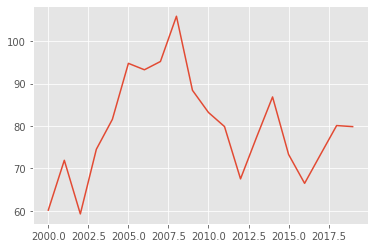

In [71]:
plt.plot(range(2000,2020),dfr_states.iloc[49,2:])

In [51]:
dfr_states.tail(50)

,Metric,State,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Natural Gas Revenue ($),AL,1.583545e+09,1.929931e+09,1.623723e+09,1.959007e+09,2.195484e+09,2.586629e+09,2.697205e+09,2.464566e+09,2.790952e+09,1.979286e+09,2.115881e+09,1.825732e+09,1.558308e+09,1.858311e+09,2.025992e+09,1.580059e+09,1.443304e+09,1.592688e+09,1.829237e+09,1.684099e+09
1,Natural Gas Revenue ($),AR,1.193507e+09,1.426400e+09,1.262586e+09,1.414311e+09,1.511850e+09,1.652197e+09,1.630881e+09,1.602959e+09,1.871660e+09,1.540977e+09,1.437762e+09,1.437341e+09,1.218813e+09,1.375071e+09,1.479679e+09,1.430149e+09,1.178304e+09,1.434939e+09,1.613177e+09,1.485941e+09
2,Natural Gas Revenue ($),AZ,6.463775e+08,7.611864e+08,8.069071e+08,7.599503e+08,8.947877e+08,9.443982e+08,1.170443e+09,1.283448e+09,1.312069e+09,1.152973e+09,1.089754e+09,1.058030e+09,9.778017e+08,9.805261e+08,1.040850e+09,1.046111e+09,9.501493e+08,9.206447e+08,9.291612e+08,8.971545e+08
3,Natural Gas Revenue ($),CA,1.088808e+10,1.245519e+10,8.992353e+09,1.240702e+10,1.403047e+10,1.636955e+10,1.576052e+10,1.549834e+10,1.771440e+10,1.153382e+10,1.242220e+10,1.248948e+10,1.075559e+10,1.223198e+10,1.311845e+10,1.170257e+10,1.239079e+10,1.309639e+10,1.306916e+10,1.461869e+10
4,Natural Gas Revenue ($),CO,1.609829e+09,2.739210e+09,1.899492e+09,1.926028e+09,2.578957e+09,3.409138e+09,3.731279e+09,2.919366e+09,3.524243e+09,2.938300e+09,2.718667e+09,2.675754e+09,2.378615e+09,2.516392e+09,2.876813e+09,2.473990e+09,2.007784e+09,2.211096e+09,2.212611e+09,2.433240e+09
5,Natural Gas Revenue ($),CT,9.874493e+08,1.015998e+09,8.852430e+08,1.166297e+09,1.215204e+09,1.428001e+09,1.372235e+09,1.405554e+09,1.573961e+09,1.254609e+09,1.258716e+09,1.239617e+09,1.174839e+09,1.257854e+09,1.477254e+09,1.251314e+09,1.183954e+09,1.323334e+09,1.437091e+09,1.492253e+09
6,Natural Gas Revenue ($),DC,3.375946e+08,3.626625e+08,3.457011e+08,4.190808e+08,4.407120e+08,4.665852e+08,4.445072e+08,4.736995e+08,4.739437e+08,4.304247e+08,4.115025e+08,3.685192e+08,3.081580e+08,3.651181e+08,3.989837e+08,3.510990e+08,2.786333e+08,3.235119e+08,3.276502e+08,3.356364e+08
7,Natural Gas Revenue ($),DE,2.406732e+08,2.784400e+08,2.788084e+08,2.856716e+08,3.379782e+08,4.240870e+08,4.733467e+08,4.290504e+08,5.127481e+08,6.072470e+08,3.964336e+08,5.277604e+08,5.982419e+08,6.264656e+08,6.163336e+08,5.951728e+08,5.109761e+08,5.567651e+08,6.216958e+08,6.207503e+08
8,Natural Gas Revenue ($),FL,1.155465e+09,1.416414e+09,1.116291e+09,1.323708e+09,1.456458e+09,1.697353e+09,1.872265e+09,1.690424e+09,1.874424e+09,1.482472e+09,1.586990e+09,1.633920e+09,1.565678e+09,1.643141e+09,1.684651e+09,1.575796e+09,1.564275e+09,1.625781e+09,1.772232e+09,1.829551e+09
9,Natural Gas Revenue ($),GA,2.404598e+09,2.542884e+09,2.342215e+09,3.120266e+09,3.600506e+09,4.467686e+09,4.227824e+09,3.957365e+09,4.589035e+09,3.437769e+09,3.687286e+09,3.240892e+09,2.776262e+09,3.174696e+09,3.514551e+09,2.889458e+09,2.724993e+09,3.014501e+09,3.058476e+09,2.934827e+09


In [61]:
res_rev = [dfr.iloc[0,i]*1000*dfr.iloc[1,i] for i in range(len(dfr.columns))]
com_rev = [dfr.iloc[2,i]*1000*dfr.iloc[3,i] for i in range(len(dfr.columns))]
#ind_rev = [dfr.iloc[4,i]*1030*dfr.iloc[5,i] for i in range(len(dfr.columns))]
#dfr.loc['Natural Gas Revenue ($)'] = [res_rev[i] + com_rev[i] + ind_rev[i] for i in range(len(res_rev))]
dfr.loc['Natural Gas Revenue ($)'] = [res_rev[i] + com_rev[i] for i in range(len(res_rev))]

In [62]:
dfr.tail()

Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
"Natural gas consumed by (delivered to) the commercial sector, Wyoming (Million cubic feet)",9.752000e+03,9.535000e+03,1.041400e+04,9.986000e+03,9.916000e+03,9.184000e+03,9.500000e+03,9.442000e+03,1.018000e+04,1.037200e+04,1.115300e+04,1.168000e+04,1.048200e+04,1.201300e+04,1.218800e+04,1.293700e+04,1.342500e+04,1.397200e+04,1.378700e+04,1.299600e+04
"Wyoming Price of Natural Gas Sold to Commercial Consumers, Annual (Dollars per Thousand Cubic Feet)",5.270000e+00,8.270000e+00,4.730000e+00,5.840000e+00,7.240000e+00,9.190000e+00,1.030000e+01,7.890000e+00,8.870000e+00,8.010000e+00,7.130000e+00,7.290000e+00,6.720000e+00,6.810000e+00,7.690000e+00,7.430000e+00,6.540000e+00,6.920000e+00,6.610000e+00,6.300000e+00
"Natural gas consumed by the industrial sector, Wyoming (Million cubic feet)",6.344200e+04,6.215900e+04,7.225100e+04,7.641900e+04,7.196200e+04,7.272200e+04,7.260700e+04,1.024150e+05,1.010330e+05,9.922600e+04,1.046220e+05,1.131580e+05,1.141730e+05,1.083260e+05,9.512000e+04,8.056700e+04,8.383200e+04,1.079510e+05,1.213490e+05,1.116480e+05
"Natural gas price in the industrial sector, Wyoming (Dollars per million Btu)",3.890000e+00,6.000000e+00,5.020000e+00,5.100000e+00,6.480000e+00,7.920000e+00,8.550000e+00,6.380000e+00,7.320000e+00,5.610000e+00,4.760000e+00,5.390000e+00,4.710000e+00,4.430000e+00,5.660000e+00,4.780000e+00,3.690000e+00,4.040000e+00,3.690000e+00,3.640000e+00
Natural Gas Revenue ($),1.257945e+08,1.716101e+08,1.303046e+08,1.450264e+08,1.763790e+08,2.071808e+08,2.332568e+08,1.838924e+08,2.253535e+08,2.019196e+08,1.903316e+08,2.009750e+08,1.672859e+08,1.946113e+08,2.176582e+08,2.041260e+08,1.899110e+08,2.097888e+08,2.041533e+08,1.951742e+08


In [16]:
dfe = return_state_EIA_data(2000,2019,'GA',get_elec_tags('GA'))
dfe.head()

Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
"Electricity price in the residential sector, Georgia (Dollars per million Btu)",22.27,22.64,22.35,22.58,23.03,25.33,26.11,26.66,29.09,29.69,29.51,32.40,32.75,33.58,34.14,33.82,33.71,34.87,33.62,34.48
"Electricity price in the commercial sector, Georgia (Dollars per million Btu)",19.28,19.60,19.14,19.51,20.17,22.49,22.90,23.64,26.57,26.21,26.54,28.92,28.07,29.27,30.35,28.98,28.76,29.57,28.70,29.37


In [10]:
dfe.index = ['Electricity Residential Price $/MMBtu',]

Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
"Electricity price in the residential sector, Georgia (Dollars per million Btu)",22.270000,22.640000,22.350000,22.580000,23.030000,25.330000,26.110000,26.660000,29.090000,29.690000,29.510000,32.400000,32.750000,33.580000,34.140000,33.820000,33.710000,34.870000,33.620000,34.480000
"Electricity price in the commercial sector, Georgia (Dollars per million Btu)",19.280000,19.600000,19.140000,19.510000,20.170000,22.490000,22.900000,23.640000,26.570000,26.210000,26.540000,28.920000,28.070000,29.270000,30.350000,28.980000,28.760000,29.570000,28.700000,29.370000
Residential Price (Inflation Adjusted to 2020 USD),5.118107,5.349693,5.365438,5.545209,5.806580,6.601463,7.023977,7.377815,8.357398,8.502472,8.589210,9.726465,10.035358,10.440548,10.786125,10.697980,10.798295,11.408675,11.267408,11.765064
Commercial Price (Inflation Adjusted to 2020 USD),4.430943,4.631360,4.594831,4.791277,5.085485,5.861307,6.160439,6.542069,7.633416,7.505888,7.724759,8.681771,8.601298,9.100501,9.588720,9.166986,9.212666,9.674635,9.618519,10.021460


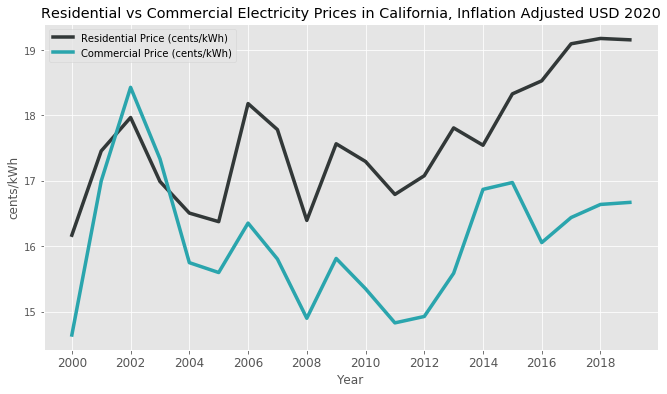

In [10]:
for sa in ['CA']:
    try:
        dfe = return_state_EIA_data(2000,2019,sa,get_elec_tags(sa))
        resprice = list(dfe.iloc[0])
        comprice = list(dfe.iloc[1])
        inf2020 = list(inf.iloc[1,:])
        dfe.loc['Residential Price (Inflation Adjusted to 2020 USD)'] = [1/inf2020[i] * resprice[i]/2.9307107 for i in range(len(inf2020))]
        dfe.loc['Commercial Price (Inflation Adjusted to 2020 USD)'] = [1/inf2020[i] * comprice[i]/2.9307107 for i in range(len(inf2020))]
        year_range = range(int(dfe.columns[0]),int(dfe.columns[-1])+1)
        plt.figure(figsize=(11,6))
        plt.plot(year_range, dfe.iloc[2],label='Residential Price (cents/kWh)',linewidth='3.5',color='#323838')
        plt.plot(year_range, dfe.iloc[3], label='Commercial Price (cents/kWh)',linewidth='3.5', color='#2aa5ad')
        plt.title('Residential vs Commercial Electricity Prices in ' + abbrev_us_state[sa] + ', Inflation Adjusted USD 2020')
        plt.xticks(np.arange(year_range[0], year_range[-1], step=2), fontsize=12)
        plt.xlabel('Year')
        plt.ylabel('cents/kWh')
        #plt.yticks(np.arange(0,int(max(dfe.iloc[2])+2), step=2), fontsize=12)
        plt.legend()
        plt.show()
        plt.close()
    except:
        print('No data for', abbrev_us_state[sa])

In [114]:
def get_tags(sa):
    return ['NG.N3050'+sa+'3.A','NG.N3010'+sa+'3.A','NG.N3020'+sa+'3.A',
    'SEDS.ESRCD.'+sa+'.A','SEDS.ESCCD.'+sa+'.A']

In [115]:
dfr = return_state_EIA_data(2000,2019,sa,get_tags(sa))

In [11]:
def get_energy_price_data(sa):
    dfr = return_state_EIA_data(start_year,end_year,sa,get_tags(sa))
    inf_adj = list(inf.iloc[1,:])
    citygate = list(dfr.iloc[0])
    ngresprice = list(dfr.iloc[1])
    ngcomprice = list(dfr.iloc[2])
    elecresprice = list(dfr.iloc[3])
    eleccomprice = list(dfr.iloc[4])
    ia_note = '(Inflation Adjusted to ' + str(inflation_adjustment_year) + ' USD)'
    dfr.loc['Natural Gas Citygate Price $/Tcf ' + ia_note] = [1/inf_adj[i] * citygate[i] for i in range(len(inf_adj))]
    dfr.loc['Natural Gas Residential Price $/Tcf ' + ia_note] = [1/inf_adj[i] * ngresprice[i] for i in range(len(inf_adj))]
    dfr.loc['Natural Gas Commercial Price $/Tcf ' + ia_note] = [1/inf_adj[i] * ngcomprice[i] for i in range(len(inf_adj))]
    dfr.loc['Electricity Residential Price $/MMBtu' + ia_note] = [1/inf_adj[i] * elecresprice[i] for i in range(len(inf_adj))]
    dfr.loc['Electricity Commercial Price $/MMBtu' + ia_note] = [1/inf_adj[i] * eleccomprice[i] for i in range(len(inf_adj))]
    return dfr

In [16]:
inf.head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,172.192,177.042,179.867,184.000,188.908,195.267,201.558,207.344,215.254,214.565,218.076,224.923,229.586,232.952,236.715,237.002,240.005,245.136,251.102,255.653
1,0.673538,0.692509,0.703559,0.719726,0.738923,0.763797,0.788405,0.811037,0.841977,0.839282,0.853016,0.879798,0.898038,0.911204,0.925923,0.927046,0.938792,0.958862,0.982199,1


In [22]:
inf.iloc[1,:]

2000    0.673538
2001    0.692509
2002    0.703559
2003    0.719726
2004    0.738923
2005    0.763797
2006    0.788405
2007    0.811037
2008    0.841977
2009    0.839282
2010    0.853016
2011    0.879798
2012    0.898038
2013    0.911204
2014    0.925923
2015    0.927046
2016    0.938792
2017    0.958862
2018    0.982199
2019           1
Name: 1, dtype: object

In [26]:
df = pd.DataFrame(columns = range(2000,2020))
df.index.name = 'Year'
df.head()
df.loc['CA Res Gas Price ($/TCF)'] = dfr.iloc[0,:]
df.loc['Inflation Adjustment Factors'] = list(inf.iloc[1,:])
df.loc['CA Res Gas Price ($/TCF) 2019-Inflation Adjusted'] = [1/inf.iloc[1,i] * dfr.iloc[0,i] for i in range(20)]
df.head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Year,,,,,,,,,,,,,,,,,,,,
CA Res Gas Price ($/TCF),516730.000000,512695.000000,510995.000000,497955.000000,512046.000000,483699.000000,491777.000000,492378.000000,489304.000000,480721.000000,494890.000000,512565.000000,477931.000000,481773.000000,397489.000000,401172.000000,411828.000000,431005.000000,423915.000000,464672.0
Inflation Adjustment Factors,0.673538,0.692509,0.703559,0.719726,0.738923,0.763797,0.788405,0.811037,0.841977,0.839282,0.853016,0.879798,0.898038,0.911204,0.925923,0.927046,0.938792,0.958862,0.982199,1.0
CA Res Gas Price ($/TCF) 2019-Inflation Adjusted,767187.643386,740344.182934,726300.014650,691867.878342,692962.161677,633282.123692,623762.219217,607096.963664,581136.868592,572776.388568,580165.232167,582593.954131,532194.880973,528721.422306,429289.463350,432742.446545,438678.626212,449496.284777,431598.081636,464672.0


In [31]:
df.loc['CA Res Gas Price ($/TCF)'] = [int(df.loc['CA Res Gas Price ($/TCF)'][i]) for i in range(2000,2020)]

In [32]:
df.head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Year,,,,,,,,,,,,,,,,,,,,
CA Res Gas Price ($/TCF),516730.000000,512695.000000,510995.000000,497955.000000,512046.000000,483699.000000,491777.000000,492378.000000,489304.000000,480721.000000,494890.000000,512565.000000,477931.000000,481773.000000,397489.000000,401172.000000,411828.000000,431005.000000,423915.000000,464672.0
Inflation Adjustment Factors,0.673538,0.692509,0.703559,0.719726,0.738923,0.763797,0.788405,0.811037,0.841977,0.839282,0.853016,0.879798,0.898038,0.911204,0.925923,0.927046,0.938792,0.958862,0.982199,1.0
CA Res Gas Price ($/TCF) 2019-Inflation Adjusted,767187.643386,740344.182934,726300.014650,691867.878342,692962.161677,633282.123692,623762.219217,607096.963664,581136.868592,572776.388568,580165.232167,582593.954131,532194.880973,528721.422306,429289.463350,432742.446545,438678.626212,449496.284777,431598.081636,464672.0


In [123]:
dfr = get_energy_price_data('GA')

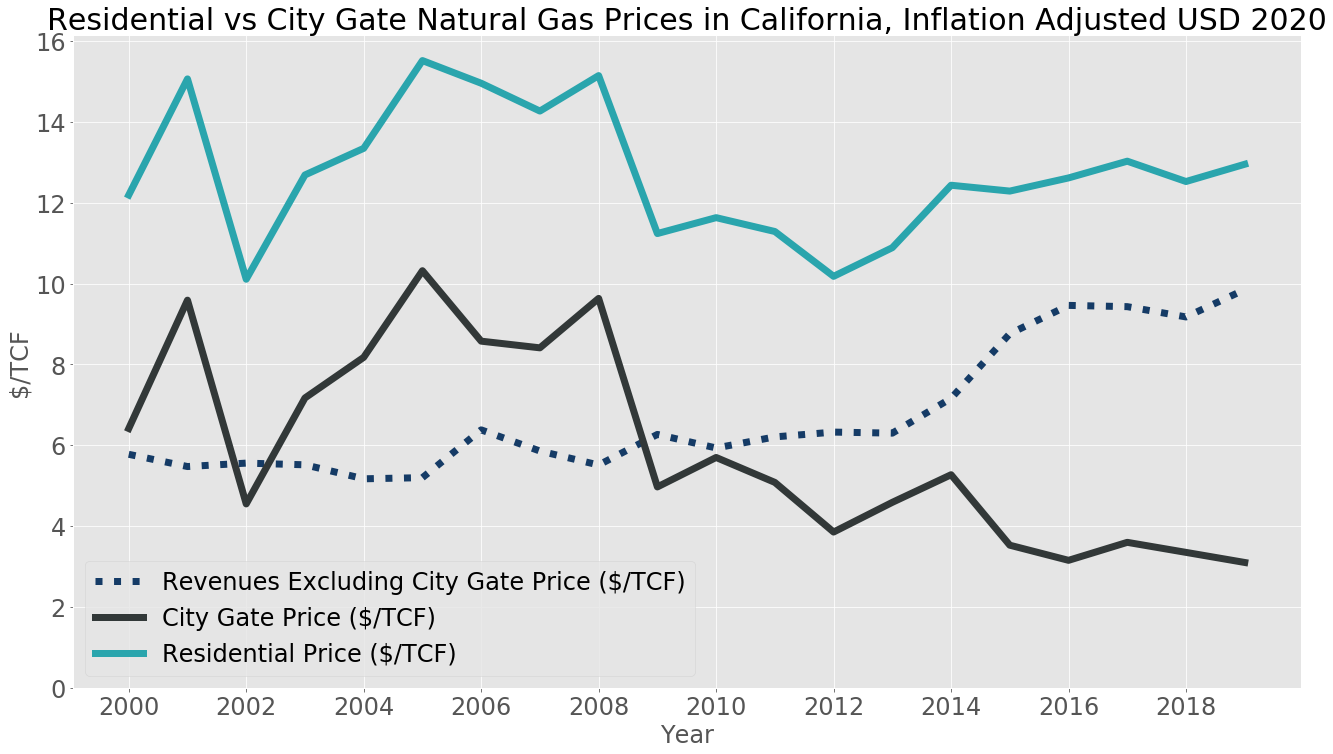

In [14]:
for sa in ['CA']:
    try:
        df = return_state_EIA_data(2000,2019,sa,get_tags(sa))
        inf2020 = list(inf.iloc[1,:])
        citygate = list(df.iloc[0])
        resprice = list(df.iloc[1])
        comprice = list(df.iloc[2])
        df.loc['Citygate Price (Inflation Adjusted to 2020 USD)'] = [1/inf2020[i] * citygate[i] for i in range(len(inf2020))]
        df.loc['Residential Price (Inflation Adjusted to 2020 USD)'] = [1/inf2020[i] * resprice[i] for i in range(len(inf2020))]
        df.loc['Commercial Price (Inflation Adjusted to 2020 USD)'] = [1/inf2020[i] * comprice[i] for i in range(len(inf2020))]
        price_diff = [df.iloc[4,i]-df.iloc[3,i] for i in range(len(df.columns))]
        year_range = range(int(df.columns[0]),int(df.columns[-1])+1)
        size_factor = 22
        plt.figure(figsize=(size_factor,size_factor*6/11))
        lw = size_factor * 3.5/11
        fs = size_factor * 12/11
        plt.plot(year_range, price_diff, ':', label='Revenues Excluding City Gate Price ($/TCF)',linewidth=lw, color='#153b66')
        plt.plot(year_range, df.iloc[3],label='City Gate Price ($/TCF)',linewidth=lw,color='#323838')
        plt.plot(year_range, df.iloc[4], label='Residential Price ($/TCF)',linewidth=lw, color='#2aa5ad')
        #plt.plot(year_range, df.iloc[5], label='Commercial Price ($/TCF)',linewidth=lw, color='black')
        plt.title('Residential vs City Gate Natural Gas Prices in ' + abbrev_us_state[sa] + ', Inflation Adjusted USD 2020', fontsize=fs*1.25)
        plt.xticks(np.arange(year_range[0], year_range[-1], step=2), fontsize=fs)
        plt.xlabel('Year', fontsize=fs)
        plt.ylabel('$/TCF', fontsize=fs)
        plt.yticks(np.arange(0,int(max(df.iloc[4])+2), step=2), fontsize=fs)
        plt.legend(fontsize=fs)
        plt.show()
        plt.close()
    except:
        print('No data for', abbrev_us_state[sa])

In [36]:
list(inf.loc[1])

[0.6735379596562528,
 0.692508986790689,
 0.7035591211524996,
 0.7197255655126285,
 0.7389234626622805,
 0.7637970217443175,
 0.7884045952912737,
 0.8110368350850568,
 0.8419772112981267,
 0.8392821519794409,
 0.853015611003978,
 0.8797980074554181,
 0.8980375743683823,
 0.9112038583548795,
 0.9259230284800101,
 0.9270456439001303,
 0.9387920345155347,
 0.9588622077581722,
 0.9821985269095219,
 1.0]

In [39]:
df2 = pd.concat([df.iloc[1,:],df.iloc[4,:]],axis=1)
df2 = df2.T
df2.index = ['CA Res Gas Price ($/TCF)', 'CA Res Gas Price ($/TCF) 2019-Inflation Adjusted']
df2.loc['Inflation Adjustment Factors'] = list(inf.loc[1])
df2.loc['CA Res Gas Price ($/TCF)'] = [str(i)[0:5] for i in df2.loc['CA Res Gas Price ($/TCF)']]
df2.loc['CA Res Gas Price ($/TCF) 2019-Inflation Adjusted'] = [str(i)[0:5] for i in df2.loc['CA Res Gas Price ($/TCF) 2019-Inflation Adjusted']]
df2.loc['Inflation Adjustment Factors'] = [str(i)[0:5] for i in df2.loc['Inflation Adjustment Factors']]

df2.head()

Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
CA Res Gas Price ($/TCF),8.21,10.43,7.11,9.13,9.86,11.85,11.79,11.57,12.75,9.43,9.92,9.93,9.14,9.92,11.51,11.39,11.84,12.49,12.3,12.95
CA Res Gas Price ($/TCF) 2019-Inflation Adjusted,5.529,7.222,5.002,6.571,7.285,9.050,9.295,9.383,10.73,7.914,8.461,8.736,8.208,9.039,10.65,10.55,11.11,11.97,12.08,12.95
Inflation Adjustment Factors,0.673,0.692,0.703,0.719,0.738,0.763,0.788,0.811,0.841,0.839,0.853,0.879,0.898,0.911,0.925,0.927,0.938,0.958,0.982,1.0


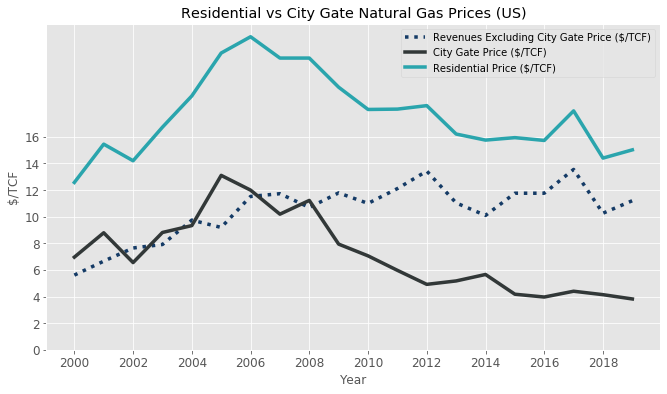

In [49]:
price_diff = [df.iloc[4,i]-df.iloc[3,i] for i in range(len(df.columns))]
year_range = range(int(df.columns[0]),int(df.columns[-1])+1)
plt.figure(figsize=(11,6))
plt.plot(year_range, price_diff, ':', label='Revenues Excluding City Gate Price ($/TCF)',linewidth='3.5', color='#153b66')
plt.plot(year_range, df.iloc[3],label='City Gate Price ($/TCF)',linewidth='3.5',color='#323838')
plt.plot(year_range, df.iloc[4], label='Residential Price ($/TCF)',linewidth='3.5', color='#2aa5ad')
plt.title('Residential vs City Gate Natural Gas Prices in ' + abbrev_us_state[sa] + ', Inflation Adjusted USD 2020')
plt.xticks(np.arange(year_range[0], year_range[-1], step=2), fontsize=12)
plt.xlabel('Year')
plt.ylabel('$/TCF')
plt.yticks(np.arange(0,17, step=2), fontsize=12)
plt.legend()
plt.show()

In [126]:
#Import FRED CPI Inflation Adjustment Data
fred_prefix = 'https://api.stlouisfed.org/fred/series/observations?series_id='
fred_api = 'd00618cf19b6ee0f138dbd06ad3b89da'
fred_series = 'CPIAUCSL'
fred_url = fred_prefix + fred_series + '&api_key='+ fred_api + '&file_type=json&frequency=a'
r = requests.get(fred_url)
json_data = r.json()

year_to_cpi = dict()
for o in list(json_data['observations']):
    year = str(o['date'][0:4])
    cpi = o['value']
    year_to_cpi[year] = cpi

#Create a DataFrame with CPIs and Inflation Adjustments
inf = pd.DataFrame(columns=[str(i) for i in year_range])
cpis = [year_to_cpi[str(i)] for i in year_range]
inf.loc[0] = cpis
adjustment_denom = float(inf.loc[0,str(inflation_adjustment_year)])
iafs = [float(cpis[i])/adjustment_denom for i in range(len(year_range))]
inf.loc[1] = iafs

In [127]:
inf.head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,172.192,177.042,179.867,184.000,188.908,195.267,201.558,207.344,215.254,214.565,218.076,224.923,229.586,232.952,236.715,237.002,240.005,245.136,251.102,255.653
1,0.673538,0.692509,0.703559,0.719726,0.738923,0.763797,0.788405,0.811037,0.841977,0.839282,0.853016,0.879798,0.898038,0.911204,0.925923,0.927046,0.938792,0.958862,0.982199,1


In [128]:
inf.loc[0,str(inflation_adjustment_year)]

'255.653'

In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests

start_year = 2000
end_year = 2019
inflation_adjustment_year = 2019
year_range = range(start_year,end_year+1)

api_key = 'c539dd02b98ef2d57482dfe39f7d6980'
my_url = 'http://api.eia.gov/series/?api_key=' + api_key + '&series_id='


#Import FRED CPI Inflation Adjustment Data
fred_prefix = 'https://api.stlouisfed.org/fred/series/observations?series_id='
fred_api = 'd00618cf19b6ee0f138dbd06ad3b89da'
fred_series = 'CPIAUCSL'
fred_url = fred_prefix + fred_series + '&api_key='+ fred_api + '&file_type=json&frequency=a'
r = requests.get(fred_url)
json_data = r.json()

year_to_cpi = dict()
for o in list(json_data['observations']):
    year = str(o['date'][0:4])
    cpi = o['value']
    year_to_cpi[year] = cpi

#Create a DataFrame with CPIs and Inflation Adjustments
inf = pd.DataFrame(columns=[str(i) for i in year_range])
cpis = [year_to_cpi[str(i)] for i in year_range]
inf.loc[0] = cpis
adjustment_denom = float(inf.loc[0,str(inflation_adjustment_year)])
iafs = [float(cpis[i])/adjustment_denom for i in range(len(year_range))]
inf.loc[1] = iafs

def get_tags(sa):
    return ['NG.N3050'+sa+'3.A','NG.N3010'+sa+'3.A','NG.N3020'+sa+'3.A',
    'SEDS.ESRCD.'+sa+'.A','SEDS.ESCCD.'+sa+'.A']

def return_state_EIA_data(start_year, end_year, sa, tags):
    years = range(start_year, end_year+1)
    final_output = pd.DataFrame(index=years)
    final_output.index.name = 'Year'
    for d in tags:
        try:
            r = requests.get(my_url + d)
        except:
            print('\n\nError requesting the following API Key: ', d,'\n\n')
        json_data = r.json()
        json_data = json_data['series'][0]
        value_name = json_data['name'] + ' (' + json_data['units'] +')'
        json_data['data']
        temp_dict = dict()
        for pair in json_data['data']:
            temp_dict[str(pair[0])] = pair[1]
        temp_col = []
        for year in years:
            temp_val = ''
            if(str(year) in temp_dict.keys()):
                temp_val = temp_dict[str(year)]  
            temp_col.append(temp_val)
        final_output[value_name] = temp_col
    return final_output.T

def get_energy_price_data(sa):
    df = return_state_EIA_data(start_year,end_year,sa,get_tags(sa))
    inf_adj = list(inf.iloc[1,:])
    ia_note = '(Inflation Adjusted to ' + str(inflation_adjustment_year) + ' USD)'
    df.loc['Natural Gas Citygate Price $/Tcf ' + ia_note] = [inf_adj[i] * list(df.iloc[0])[i] for i in range(len(inf_adj))]
    df.loc['Natural Gas Residential Price $/Tcf ' + ia_note] = [inf_adj[i] * list(df.iloc[1])[i] for i in range(len(inf_adj))]
    df.loc['Natural Gas Commercial Price $/Tcf ' + ia_note] = [inf_adj[i] * list(df.iloc[2])[i] for i in range(len(inf_adj))]
    df.loc['Electricity Residential Price $/MMBtu ' + ia_note] = [inf_adj[i] * list(df.iloc[3])[i] for i in range(len(inf_adj))]
    df.loc['Electricity Commercial Price $/MMBtu ' + ia_note] = [inf_adj[i] * list(df.iloc[4])[i] for i in range(len(inf_adj))]
    df.loc['Inflation Adjustment Factor (' + str(inflation_adjustment_year) + ')'] = inf_adj
    return df

In [141]:
dfga = get_energy_price_data('GA')